
# <font color=#770000>ICPE 639 Introduction to Machine Learning </font>

## ------ With Energy Applications

Some of the examples and exercises of this course are based on several books as well as open-access materials on machine learning, including [Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


<p> &#169; 2021: Xiaoning Qian </p>

[Homepage](http://xqian37.github.io/)

**<font color=blue>[Note]</font>** This is currently a work in progress, will be updated as the material is tested in the class room.

All material open source under a Creative Commons license and free for use in non-commercial applications.

Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Deep Neural Networks (DNNs)

Here we first provide a brief overview of existing deep neural networks and then focus on Recurrent Neural Networks (RNNs). This section will cover the content listed below: 

- [1 Deep Neural Networks](#1-Deep-Neural-Networks)
- [2 Recurrent Neural Networks](#2-Recurrent-Neural-Networks)
- [3 Hands-on Exercise](#3-Hands-on-Exercise)
- [Reference](#Reference) 



In [1]:
# required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.externals.six import StringIO  
import pydot
from IPython.display import Image
from IPython.core.display import HTML
from sklearn.metrics import accuracy_score

import seaborn as sns
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## 1 Deep Neural Networks

**Deep Learning** is one family of machine learning models originated from **artificial neural networks** but with enriched topology/architecture to better model dependency given a prediction task and data. 


### Overview

In the previous module, we have briefly reviewed the basics of artificial neural networks, mostly with the architecture of classic **multi-layer perceptrons (MLPs)**, which can be considered as a network of multiple *fully-connected* layers in DNN terms. 

There have been fast and significant development of DNNs for the past decade. From my personal viewpoint, there are two categories of existing DNNs, **discriminative** and **generative** as in traditional supervised learning. The important generative DNNs include **Variational Auto-Encoders (VAE)** and **Generative Adverserial Networks (GAN)**, which we will not cover in this short course. Many DNNs were started with discriminative tasks, for example, image classification in the famous ImageNet, which often is considered as an important milestone of Deep Learning. There have been many efforts in designing the architecture of DNNs based on the learning task and data of interest (Neural Architecture Search (NAS) or Automated Machine Learning (AutoML)). 

Three most popular deep architectures based on the data dependency structures are: 
1. **Convolutional Neural Networks (CNN)**
2. **Recurrent Neural Networks (RNN)**
3. **Graph Neural Networks (GNN)**

If you have basic knowledge of these DNNs, CNN basically assumes local spatial dependency (suitable in image analysis and computer vision); RNN assumes temporal/sequential dependency (suitable for time series and sequence analyses, for example Natural Language Processing (NLP)); GNN assumes more general unstructured dependency. 

<img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png" alt="CNN">

<center>CNN Schematic</center>



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/2880px-Recurrent_neural_network_unfold.svg.png" alt="RNN">

<center>RNN Schematic with Unrolling/Unfolding</center>



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Gated_Recurrent_Unit.svg/2880px-Gated_Recurrent_Unit.svg.png" alt="GRU">

<center>Gated Recurrent Unit (GRU) is one of RNN models</center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Long_Short-Term_Memory.svg/2880px-Long_Short-Term_Memory.svg.png" alt="GRU">

<center>Long Short-Term Memory  (LSTM) is another RNN model</center>


<img src="https://tkipf.github.io/graph-convolutional-networks/images/gcn_web.png" alt="RNN">

<center>GNN Schematic</center>


We will showcase RNNs as it may have more applications in energy. Although these different DNNs have corresponding learning strategies and tricks but they do share the same underlying principles, for example, model inference based on backpropagation as introduced earlier. If needed (for example, when integrating different data types), you can use multiple architectures in one model. 


## 2 Recurrent Neural Networks

As illustrated in the above schematic illustrations, RNNs aims at better modeling temporal dependency by taking the input at the current time point (or *frame*) as well as the output (as extracted features or states if you may) from the past. 

Let's explain the key idea of RNN without getting too much details on the design of different recurrent neurons, for example, different **internal memory** as well as **update**, **forget**, and **state** gating mechanisms in GRU or LSTM. 

In essense, the prediction is made by aggregating the current and past information in RNNs. One of simple RNN is to have the following input-output relationship (transformation/mapping): 
$$ h_t = g(W_x x_t + W_h h_{t-1} + b), \quad o_t = \phi(h_t). $$
Note the similarity of this formulation with both classical state-space models and other deep neural networks. 

With this basic understanding of the RNN architecture, we can see that training RNN can be similarly done by backpropagation as we explained for general ANNs. 

<font color=blue>Note: </font> Applications can be found in the following links: 

https://github.com/tamu-engineering-research/2021TXPowerOutage

https://github.com/tamu-engineering-research/COVID-EMDA

https://towardsdatascience.com/recurrent-neural-networks-by-example-in-python-ffd204f99470

https://github.com/jtao/AdvancedML/blob/main/Prediction_methods.ipynb

## 3 Hands-on Exercise: Multi-Step LSTM Time Series Forecasting Models for Power Usage

We use an example from [Jason Brownlee](https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/). The ‘Household Power Consumption‘ dataset is a multivariate time series dataset that describes the electricity consumption for a single household over four years. The question for the dataset is: given recent power consumption, what is the expected power consumption for the week ahead? This requires that a predictive model forecast the total active power for each day over the next seven days.

In [2]:
# download and unzip the dataset
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip'
!unzip household_power_consumption.zip

--2021-09-17 22:51:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20640916 (20M) [application/x-httpd-php]
Saving to: ‘household_power_consumption.zip’

household_power_con 100%[===================>]  19.68M  27.8MB/s    in 0.7s    

2021-09-17 22:51:42 (27.8 MB/s) - ‘household_power_consumption.zip’ saved [20640916/20640916]

Archive:  household_power_consumption.zip
  inflating: household_power_consumption.txt  


To predict the daily power consumption, we need to downsample the per-minute observations of power consumption to daily totals. We can achieve this easily using the resample() function on the pandas DataFrame. Calling this function with the argument ‘D‘ allows the loaded data indexed by date-time to be grouped by day (see all offset aliases). We can then calculate the sum of all observations for each day and create a new dataset of daily power consumption data for each of the eight variables.

In [3]:
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

# load all data
dataset = read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
# mark all missing values
dataset.replace('?', nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')
# fill missing
fill_missing(dataset.values)
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# resample minute data to total for each day
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())
# save
daily_data.to_csv('household_power_consumption_days.csv')

(1442, 8)
            Global_active_power  ...  sub_metering_4
datetime                         ...                
2006-12-16          1209.176025  ...    14680.933594
2006-12-17          3390.459961  ...    36946.667969
2006-12-18          2203.825928  ...    19028.433594
2006-12-19          1666.193970  ...    13131.900391
2006-12-20          2225.748047  ...    20384.800781

[5 rows x 8 columns]


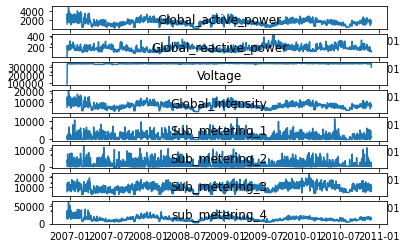

In [4]:
# line plots
from pandas import read_csv
from matplotlib import pyplot
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# line plot for each variable
pyplot.figure()
for i in range(len(dataset.columns)):
	pyplot.subplot(len(dataset.columns), 1, i+1)
	name = dataset.columns[i]
	pyplot.plot(dataset[name])
	pyplot.title(name, y=0)
pyplot.show()

**Train/Test set split**: We will use the first three years of data for training predictive models and the final year for evaluating models. The data in a given dataset will be divided into standard weeks. These are weeks that begin on a Sunday and end on a Saturday. The function split_dataset() below splits the daily data into train and test sets and organizes each into standard weeks.

**Evaluation Metric**: The function evaluate_forecasts() below will calculate the RMSE across all forecast days, and return the overall RMSE regardless of day, then an array of RMSE scores for each day.

**Vanilla LSTM Model**: The build_model() function below prepares the training data, defines a simple LSTM model with univariate input and vector output, and fits the model on the training data, returning the fit model ready for making predictions.

**Make predictions**: The forecast() function below makes a prediction using the fit model and the input data and retrieve the vector of seven days of output.


In [5]:
# univariate multi-step lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=7):
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(len(data)):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            x_input = data[in_start:in_end, 0]
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 0])
        # move along one time step
        in_start += 1
    return array(X), array(y)

# train the model
def build_model(train, n_input):
    # prepare data
    train_x, train_y = to_supervised(train, n_input)
    # define parameters
    verbose, epochs, batch_size = 0, 70, 16
    n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
    # define model
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    # fit network
    model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
    return model

# make a forecast
def forecast(model, history, n_input):
    # flatten data
    data = array(history)
    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    # retrieve last observations for input data
    input_x = data[-n_input:, 0]
    # reshape into [1, n_input, 1]
    input_x = input_x.reshape((1, len(input_x), 1))
    # forecast the next week
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    yhat = yhat[0]
    return yhat

# evaluate a single model
def evaluate_model(train, test, n_input):
    # fit model
    model = build_model(train, n_input)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

A plot of the daily RMSE is created. We can increase the number of prior days to use as input from 7 to 14 by changing the n_input variable to view different results.

lstm: [379.939] 374.3, 417.0, 342.9, 372.5, 372.0, 334.2, 436.0


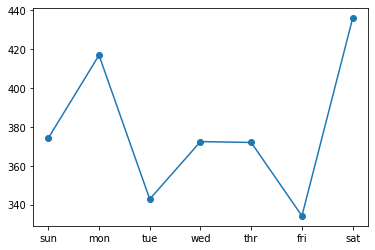

In [6]:
# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# evaluate model and get scores
n_input = 14
score, scores = evaluate_model(train, test, n_input)
# summarize scores
summarize_scores('lstm', score, scores)
# plot scores
days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat']
pyplot.plot(days, scores, marker='o', label='lstm')
pyplot.show()

## Reference 
* [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://github.com/ageron/handson-ml)
* [Hands-on ML 2](https://github.com/ageron/handson-ml2) 


# Questions? 

In [7]:
Image(url= "https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png", width=100)
